你好，我是七月在线fan:  
print("julyfan")是为了防中断  
文档会不定期更新  
建议去kaggle fork运行代码，可以不用下载数据集和配置环境，还有免费的gpu  
有问题请指出！感谢！  
转载请注明出处  
这是原作者的kernel：  
https://www.kaggle.com/qitvision/a-complete-ml-pipeline-fast-ai/  
这是这篇kernel的地址(正在Commit)：  
https://www.kaggle.com/fanhaobei/a-complete-ml-pipeline/  
这是七月在线的网址：  
https://www.julyedu.com/

补充资料 One Page Knowledge   https://alexiej.github.io/deepnn/#gpu-servers

**Sections of this kernel这篇kernel的目录**
- Project understanding了解项目
- Data understanding了解数据
- Data visualization数据可视化
- Baseline model (Fastai v1)基准模型
- Validation and analysis验证和分析
    - Metrics 指标
    - Prediction and activation visualizations预测和热图可视化
    - ROC & AUC 指标
- Submit提交
- Deploy(example)部署

<center>Section: Data visualization数据可视化(第一行是正常的，第二行是有癌的)</center>
<div align=center>
<a href="https://ibb.co/5Mpm3ZF"><img src="https://i.ibb.co/gjqN8YV/metastases.png" alt="metastases" width="1400" hegiht="400" border="0" align="center"></a></div>   
<br>
<br>
<br>
<br>
<br>
<br>
<center>Section: Prediction and activation visualizations预测和热图可视化  
    (第一行是随机取样，第二行是最错误的，第三行是最正确的。预测类别/真实类别/损失值/概率)</center>
<div align=center>
<a href="https://ibb.co/Pc6wbyk"><img src="https://i.ibb.co/sKVyD47/gradcam.png" alt="gradcam" width="1800" hegiht="400" border="0"></a></div>

# Project understanding了解项目
###  What exactly is the problem?问题是什么？

**Binary image classification problem.图像二分类问题** Identify the presence of metastases from 96 x 96px digital histopathology images. One key challenge is that the metastases can be as small as single cells in a large area of tissue.  
判断96 x 96像素的数字组织病理学图像中转移癌细胞的存在。一个关键的挑战是转移癌细胞非常小。

### How would a solution look like?我们期望的解决方案？

**Our evaluation metric is [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic).** The ROC curve is a plot of *True positive rate* against *False positive rate* at various thresholds and the area under the curve (AUC) is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. The best possible solution would yield an AUC of 1 which means we would classify all positive samples correctly without getting any false positives.   
我们的评估指标是ROC曲线下面积.ROC曲线是不同阈值下的真正例率与假正例率的曲线图，曲线下面积（AUC）等于分类器对概率排序后 正例高于反例的比例。AUC最理想的值为1，这意味着我们将正确地对所有正例进行分类而没有将任何反例当做正例。  

![ROC curve 曲线下面积example](https://i.ibb.co/mBKh6ZB/roc.png)
<p style="text-align: center;"> ROC curve from a previous run of this kernel这篇kernel的ROC曲线 </p>

### What is known about the domain?专业领域知识？

**The histopathological images are glass slide microscope images of lymph nodes that are stained with hematoxylin and eosin (H&E).** This staining method is one of the most widely used in medical diagnosis and it produces blue, violet and red colors. Dark blue hematoxylin binds to negatively charged substances such as nucleic acids and pink eosin to positively charged substances like amino-acid side chains (most proteins). Typically nuclei are stained blue, whereas cytoplasm and extracellular parts in various shades of pink.  
**组织病理学图像是用苏木精和伊红（H＆E）染色的淋巴结的玻璃载玻片显微镜图像。**这种染色方法是医学诊断中最广泛使用的方法之一，它产生蓝色，紫色和红色。 深蓝苏木精与带负电荷的物质（如核酸和粉红素）结合到带正电荷的物质如氨基酸侧链（大多数蛋白质）。 通常，细胞核染成蓝色，而细胞质和细胞外部分染成各种粉红色。  

**Low-resolution低分辨率**             | **Mid-resolution中等分辨率**            | **High-resolution高分辨率** 
:-------------------------:|:-------------------------:|:-------------------------:
![](https://camelyon17.grand-challenge.org/site/CAMELYON17/serve/public_html/example_low_resolution.png) | ![Example of a metastatic region转移癌例子](https://camelyon17.grand-challenge.org/site/CAMELYON17/serve/public_html/example_mid_resolution.png) | ![Example of a metastatic region转移癌例子](https://camelyon17.grand-challenge.org/site/CAMELYON17/serve/public_html/example_high_resolution.png)
**[<p style="text-align: center;"> Example of a metastatic region in lymph nodes淋巴结转移癌区域的例子, CHAMELYON17 </p>](https://camelyon17.grand-challenge.org/Background/)**

Lymph nodes are small glands that filter the fluid in the lymphatic system and they are the first place a breast cancer is likely to spread. Histological assessment of lymph node metastases is part of determining the stage of breast cancer in TNM classification which is a globally recognized standard for classifying the extent of spread of cancer. The diagnostic procedure for pathologists is tedious and time-consuming as a large area of tissue has to be examined and small metastases can be easily missed.  
淋巴结是小腺体，可过滤淋巴系统中的液体，它们是乳腺癌可能传播的第一个位置。 淋巴结转移的组织学评估是TNM分类中确定乳腺癌分期的一部分，TNM分类是用于分类癌症扩散程度的全球公认标准。 病理学家的诊断程序繁琐且耗时，因为必须检查大面积的组织并且很容易错过小的转移癌细胞。  

**Useful links for background knowledge参考链接**
- [Patch Camelyon (PCam)](https://github.com/basveeling/pcam)
- [Hematoxylin and eosin staining of tissue and cell sections](https://www.ncbi.nlm.nih.gov/pubmed/21356829)
- [H&E-stained sentinel lymph node sections of breast cancer patients: the CAMELYON dataset](https://academic.oup.com/gigascience/article/7/6/giy065/5026175)
- [CAMELYON16 - background](https://camelyon16.grand-challenge.org/Background/)
- [CAMELYON17 - background](https://camelyon17.grand-challenge.org/Background/)
- [TNM classification](https://www.uicc.org/resources/tnm)

# Data understanding了解数据
### What data do we have available?我们有哪些数据？  

**220k training images and 57k evaluation images.** The dataset is a subset of the [PCam dataset](https://github.com/basveeling/pcam) and the only difference between these two is that all duplicate images have been removed. The PCam dataset is derived from the [Camelyon16 Challenge dataset](https://camelyon16.grand-challenge.org/Data/) which contains 400 H&E stained whole slide images of sentinel lymph node sections that were acquired and digitized at 2 different centers using a 40x objective. The PCam's dataset including this one uses 10x undersampling to increase the field of view, which gives the resultant pixel resolution of 2.43 microns.  
220k训练图像和57k评估图像。数据集是PCam数据集的子集，这两者之间的唯一区别是所有重复的图像都已被删除。PCam数据集来自Camelyon16 Challenge数据集，其中包含400个H＆E染色标记的淋巴结切片的整个载玻片图像，使用40倍物镜在2个不同的中心采集和数字化。PCam的数据集（包括此数据集）使用10倍欠采样来增加视场，从而得到2.43微米的最终像素分辨率。  


According to the data description, there is a 50/50 balance between positive and negative examples in the training and test splits. However, **the training distribution seems to be 60/40 (negatives/positives)**. A positive label means that there is at least one pixel of tumor tissue in the center region (32 x 32px) of the image. **Tumor tissue in the outer region of the patch does not influence the label.** This means that a negatively labeled image could contain metastases in the outer region. Thus, it would be a good idea to crop the images to the center region.  
根据数据描述，训练和测试集中的正例和反例之间存在50/50的平衡。 但是，**训练数据的分布似乎是60/40（负数/正数）**。 正例标记意味着在图像的中心区域（32×32像素）中存在至少一个肿瘤组织像素。 **贴片外部区域的肿瘤组织不会影响最后的标签。**这意味着反例标记的图像(中心没有肿瘤细胞)可能外部区域包含转移癌细胞。因此，将图像裁剪到中心区域是个好主意。  


**Image file descriptors图像文件的描述**

Description | 
:--------:|:-------:
Format(格式) | TIF
Size(尺寸) | 96 x 96
Channels(通道数) | 3
Bits per channel(每个通道的比特数) | 8
Data type(数据类型) | Unsigned char
Compression(压缩方式) | Jpeg

### Is the data relevant to the problem?数据是否与问题相关？  

This dataset is a combination of two independent datasets collected in Radboud University Medical Center (Nijmegen, the Netherlands), and the University Medical Center Utrecht (Utrecht, the Netherlands). The slides are produced by routine clinical practices and a trained pathologist would examine similar images for identifying metastases. However, some relevant information about the surroundings might be left out with these small-sized image samples.  
该数据集是在Radboud大学医学中心（荷兰奈梅亨）和乌得勒支大学医学中心（荷兰乌得勒支）收集的两个独立数据集的组合。 幻灯片通过常规临床实践产生，并且训练有素的病理学家将检查用于识别转移癌的类似图像。 但是，这些小尺寸图像样本可能会遗漏一些有关周围环境的相关信息。

### Is it valid? Does it reflect our expectations?有效吗？ 它是否反映了我们的期望？

According to the data description, the dataset has been stripped of duplicates. However, this has not been confirmed by testing.  
根据数据描述，数据集已被删除重复数据。 但是，我们的测试不能证实这一点。  

> For the entire dataset, when the slide-level label was unclear during the inspection of the H&E-stained slide, an additional WSI with a consecutive tissue section, immunohistochemically stained for cytokeratin, was used to confirm the classification.  
对于整个数据集，当在检查H＆E染色的载玻片期间载玻片水平标记不清楚时，使用具有连续组织切片的额外WSI，对细胞角蛋白进行免疫组织化学染色，以确认分类。  
- [1399 H&E-stained sentinel lymph node sections of breast cancer patients: the CAMELYON dataset(1399 H＆E染色乳腺癌患者的标记淋巴结切片：CAMELYON数据集)](https://academic.oup.com/gigascience/article/7/6/giy065/5026175)

### Is the data quality, quantity, recency sufficient?数据质量，数量，新近度是否足够？  

> All glass slides included in the CAMELYON dataset were part of routine clinical care and are thus of diagnostic quality. However, during the acquisition process, scanning can fail or result in out-of-focus images. As a quality-control measure, all slides were inspected manually after scanning. The inspection was performed by an experienced technician (Q.M. and N.S. for UMCU, M.H. or R.vd.L. for the other centers) to assess the quality of the scan; when in doubt, a pathologist was consulted on whether scanning issues might affect diagnosis.  
CAMELYON数据集中包含的所有载玻片均为常规临床护理的一部分，因此具有诊断质量。 但是，在采集过程中，扫描可能会失败或图像失焦。 作为质量控制措施，扫描后手动检查所有载玻片。 检查由经验丰富的技术人员（Q.M.和N.S.为UMCU，M.H。或R.vd.L.为其他中心）进行，以评估扫描质量; 如有疑问，请咨询病理学家，了解扫描问题是否会影响诊断。  
- [1399 H&E-stained sentinel lymph node sections of breast cancer patients: the CAMELYON dataset](https://academic.oup.com/gigascience/article/7/6/giy065/5026175)

-----------------------------------------
# Data visualization

In [ ]:
import numpy as np #矩阵运算
import pandas as pd #特征工程
import os #os模块负责程序与操作系统的交互，提供了访问操作系统底层的接口
import cv2 #opencv 图像预处理
import matplotlib.pyplot as plt #画图
import matplotlib.patches as patches #生成常见图形对象如：矩形，椭圆，圆形，多边形
import random #生成随机变量
from sklearn.utils import shuffle #洗牌：某个集合的随机排列组合
from tqdm import tqdm_notebook #进度条

data = pd.read_csv('/kaggle/input/train_labels.csv') #读取csv文件转化为pandas dataframe
train_path = '/kaggle/input/train/' #训练集路径
test_path = '/kaggle/input/test/' #测试集路径
# quick look at the label stats 
data['label'].value_counts() #pd.Series.value_counts()  统计data['label']这个series的每种值的个数

We can see that the negative/positive ratio is not entirely 50/50 as there are 130k negatives and 90k negatives. The ratio is closer to 60/40 meaning that there are 1.5 times more negative images than positives.  
我们可以看到负/正比率不完全是50/50，因为有130k的负数和90k的负数。 该比率接近60/40，这意味着负像的数量是正数的1.5倍。

### Plot some images with and without cancer tissue for comparison 画出一些有癌组织和没有癌组织的图像进行比较

In [ ]:
def readImage(path):
    # OpenCV reads the image in bgr format by default   OpenCV默认以bgr格式读取图像，path是图像的地址
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes   我们将图片翻转为rgb格式用于观看
    # cv2.split函数分离得到各个通道的灰度值(单通道图像)  https://blog.csdn.net/eric_pycv/article/details/72887758
    b,g,r = cv2.split(bgr_img)
    # cv2.merge函数是合并单通道成多通道（不能合并多个多通道图像） 
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

In [ ]:
# random sampling训练标记随机抽样
shuffled_data = shuffle(data) 
# matpoltlib subplots :创建一系列的子图  nrows子图行的个数2，ncols子图列的个数5 ,figsize画布尺寸, axes子图的轴， fig图
fig, ax = plt.subplots(2,5, figsize=(20,8))
# 标题
fig.suptitle('Histopathologic scans of lymph node sections淋巴结切片的组织病理学扫描',fontsize=20)
# Negatives反例(没有转移癌)
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]): # idx是随机排列的前五个反例的图片名，i是0~4的索引
    path = os.path.join(train_path, idx) # 将训练集路径与反例图片名 拼接起来
    ax[0,i].imshow(readImage(path + '.tif')) # 在坐标为[0,i]的轴上画出这张反例图
    # Create a Rectangle patch # 画出蓝色中心虚线矩形框
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='b',facecolor='none', linestyle=':', capstyle='round')
    ax[0,i].add_patch(box) # 在坐标为[0,i]的轴上画出这个矩形框
ax[0,0].set_ylabel('Negative samples反例样本(无肿瘤)', size='large') # 给坐标为[0,0]的轴画出其y轴标题
# Positives正例(有转移癌)
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]): # idx是随机排列的前五个正例的图片名，i是0~4的索引
    path = os.path.join(train_path, idx) # 将训练集路径与正例图片名 拼接起来
    ax[1,i].imshow(readImage(path + '.tif'))  # 在坐标为[1,i]的轴上画出这张正例图
    # Create a Rectangle patch # 画出红色中心虚线矩形框
    box = patches.Rectangle((32,32),32,32,linewidth=4,edgecolor='r',facecolor='none', linestyle=':', capstyle='round')
    ax[1,i].add_patch(box) # 在坐标为[0,i]的轴上画出这个矩形框
ax[1,0].set_ylabel(u"Tumor tissue samples肿瘤组织样本", size='large') # 给坐标为[1,0]的轴画出其y轴标题

Classifying metastases is probably not an easy task for a trained pathologist and extremely difficult for an untrained eye. According to [Libre Pathology](https://librepathology.org/wiki/Lymph_node_metastasis), lymph node metastases can have these features:  
对于训练有素的病理学家来说，转移癌分类可能不是一件容易的事，而对于未经训练的人来说则非常困难。根据Libre病理学，淋巴结转移癌细胞具有以下特征：

> - Foreign cell population - key feature (Classic location: subcapsular sinuses)外来细胞群 - 关键特征（经典位置：包膜下窦）
- Cells with cytologic features of malignancy具有恶性肿瘤细胞学特征的细胞
    - Nuclear pleomorphism (variation in size, shape and staining).核多形性（大小，形状和染色的变化）
    - Nuclear atypia:核非典型：
        - **Nuclear enlargement核扩大**.
        - **Irregular nuclear membrane核膜不规则**.
        - **Irregular chromatin pattern, esp. asymmetry不规则的染色质模式，尤其是不对称**.
        - **Large or irregular nucleolus大或不规则的核仁*.
     - Abundant mitotic figures丰富的有丝分裂数字
- Cells in architectural arrangements seen in malignancy; highly variable - dependent on tumour type and differentiation在恶性肿瘤中看到的建筑安排中的细胞;高度可变 - 依赖于肿瘤类型和分化
    - Gland formation.腺体形成
    - Single cells.单细胞
    - Small clusters of cells.小细胞群
  
**The takeaway from this is probably that irregular nuclear shapes, sizes or staining shades can indicate metastases.这可能是由于不规则的核形状，大小或染色阴影可能表明转移癌**

### How is the data best transformed for modeling?如何最好地为建模转换数据？

We know that the label of the image is influenced only by the center region (32 x 32px) so it would make sense to crop our data to that region only. However, some useful information about the surroundings could be lost if we crop too close.  This hypothesis could be confirmed by training models with varying crop sizes. My initial results with 32 x 32px size showed worse performance than with 48 x 48px but I haven't done a search for optimal size.  
我们知道图像的标签仅受中心区域（32 x 32px）的影响，因此将数据裁剪到该区域是有意义的。但是，如果我们收得太近，一些关于周围环境的有用信息可能会丢失。这种假设可以通过具有不同切割大小的训练模型来确认。我的初始结果是32 x 32px尺寸表现出比48 x 48px更差的性能，但我还没有寻找最佳尺寸。  

### How may we increase the data quality?我们如何提高数据质量？

We could inspect if the data contains bad data (too unfocused or corrupted) and remove those to increase the overall quality.  
我们可以检查数据是否包含错误数据（未聚焦或损坏的图片）并删除这些数据以提高整体质量。

### Preprocessing and augmentation 预处理和数据增强
There are couple of ways we can use to avoid overfitting; more data, augmentation, regularization and less complex model architectures. Here we will define what image augmentations to use and add them directly to our image loader function. Note that if we apply augmentation here, augmentations will also be applied when we are predicting (inference). This is called test time augmentation (TTA) and it can improve our results if we run inference multiple times for each image and average out the predictions.   
我们可以使用几种方法来避免过度拟合; 更多数据，数据增强，正则化和不太复杂的模型架构。 在这里，我们将定义图像增强，并将它们直接添加到我们的图像加载函数中。 请注意，如果我们在此处(加载图像函数)应用数据增强，则在我们预测（推理）时也会应用数据增强。 这称为测试时间增强（TTA），如果我们为每个图像预测多次并做平均，可以改善我们的结果。  


**The augmentations we can use for this type of data:我们可以用于此类数据的增强：**
- random rotation随机旋转
- random crop随机剪裁
- random flip (horizontal and vertical both)随机翻转(横向和纵向)
- random lighting随机调整像素值
- random zoom (not implemented here)随机尺寸缩放
- Gaussian blur (not implemented here)高斯噪音

We will use OpenCV with image operations because in my experience, OpenCV is a lot faster than *PIL* or *scikit-image*.我们将使用OpenCV进行图像预处理，因为根据我的经验，OpenCV比PIL或scikit-image快得多。

In [ ]:
import random # 生成随机变量
ORIGINAL_SIZE = 96      # original size of the images - do not change原始图片尺寸

# AUGMENTATION VARIABLES # 数据增强的变量
CROP_SIZE = 90          # final size after crop剪裁后的图片大小
RANDOM_ROTATION = 3    # range (0-180), 180 allows all rotation variations, 0=no change旋转角度

RANDOM_SHIFT = 2        #> center crop shift in x and y axes, 0=no change. This cannot be more than (ORIGINAL_SIZE - CROP_SIZE)//2 
# 随机平移0到2个像素值

RANDOM_BRIGHTNESS = 7  # range (0-100), 0=no change 随机亮度 给图像每个像素加上一个在(-1,1)间的随机值
RANDOM_CONTRAST = 5    # range (0-100), 0=no change 随机对比度 给图像每个像素乘上一个在(0,2)间的随机值
RANDOM_90_DEG_TURN = 1  # 0 or 1= random turn to left or right向左或右旋转90度

def readCroppedImage(path, augmentations = True):
    # augmentations parameter is included for counting statistics from images, where we don't want augmentations这个参数可以用来选择是否使用数据增强
      
    # OpenCV reads the image in bgr format by default 用opencv读取图片，通道格式默认是bgr
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes 我们将图片翻转为rgb格式用于观看
    # cv2.split函数分离得到各个通道的灰度值(单通道图像)  https://blog.csdn.net/eric_pycv/article/details/72887758
    b,g,r = cv2.split(bgr_img)
    # cv2.merge函数是合并单通道成多通道（不能合并多个多通道图像） 
    rgb_img = cv2.merge([r,g,b])
    
    if(not augmentations): # 如果augmentations等于false,即不做数据增强，只将图像像素的值归一化
        return rgb_img / 255
    
    #random rotation 随机旋转
    rotation = random.randint(-RANDOM_ROTATION,RANDOM_ROTATION)  #在(a,b)之间随机生成一个整数
    if(RANDOM_90_DEG_TURN == 1):#如果随机旋转90度开启为1，rotation就随机加上90度或0度或负90度
        rotation += random.randint(-1,1) * 90 
    M = cv2.getRotationMatrix2D((48,48),rotation,1)   # 第一个参数是旋转的中心点，第二个参数是旋转的角度，第三个参数是图像缩放因子，1
    rgb_img = cv2.warpAffine(rgb_img,M,(96,96)) # 第一个参数是输入图片，第二个参数是仿射变换矩阵，第三个是输出图片的尺寸
    
    #random x,y-shift根据x轴y轴随机平移
    x = random.randint(-RANDOM_SHIFT, RANDOM_SHIFT) # 在(a,-a)之间生成一个随机整数，用于x轴方向的平移
    y = random.randint(-RANDOM_SHIFT, RANDOM_SHIFT) # 在(a,-a)之间生成一个随机整数，用于y轴方向的平移
    # crop to center and normalize to 0-1 range 中心剪裁 并将图像像素值归一化
    start_crop = (ORIGINAL_SIZE - CROP_SIZE) // 2 # 开始剪裁的坐标。默认左上角坐标是(0,0)
    end_crop = start_crop + CROP_SIZE  # 终止剪裁的坐标。默认左上角坐标是(0,0)
    rgb_img = rgb_img[(start_crop + x):(end_crop + x), (start_crop + y):(end_crop + y)] / 255  # 除号之前的是对原图像做中心剪裁后的图像矩阵，除是为了归一化
    
    # Random flip 随机翻转
    flip_hor = bool(random.getrandbits(1)) # getrandbits(k)返回一个k比特位随机的整数.bool(1)是true,bool(0)是false。
    flip_ver = bool(random.getrandbits(1)) # getrandbits(k)返回一个k比特位随机的整数.bool(1)是true,bool(0)是false。
    if(flip_hor):
        rgb_img = rgb_img[:, ::-1] # [:,::-1]将图像每一行的像素做倒序，相当于水平方向翻转
    if(flip_ver):
        rgb_img = rgb_img[::-1, :] # [::-1, :] 将图像每一列的像素做倒序，相当于垂直方向翻转
        
    # Random brightness 随机亮度 给图像每个像素加上一个在(-1,1)间的随机值
    br = random.randint(-RANDOM_BRIGHTNESS, RANDOM_BRIGHTNESS) / 100.   
    rgb_img = rgb_img + br
    
    # Random contrast 随机对比度 给图像每个像素乘上一个在(0,2)间的随机值
    cr = 1.0 + random.randint(-RANDOM_CONTRAST, RANDOM_CONTRAST) / 100.
    rgb_img = rgb_img * cr
    
    # clip values to 0-1 range 
    rgb_img = np.clip(rgb_img, 0, 1.0) # 图像中像素值比0小的变为0，比1大的变为1
    
    return rgb_img

In [ ]:
print("julyfan")

In [ ]:
# matpoltlib subplots :创建一系列的子图  nrows子图行的个数，ncols子图列的个数 ,figsize画布尺寸, axes子图的轴， fig图
fig, ax = plt.subplots(2,5, figsize=(20,8))
fig.suptitle('Cropped histopathologic scans of lymph node sections 切除淋巴结切片的组织病理学扫描',fontsize=20) # 标题
# Negatives 反例(没有转移癌)
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:5]): # idx是随机排列的前五个反例的图片名，i是0~4的索引
    path = os.path.join(train_path, idx) # 将训练集路径与反例图片名 拼接起来
    ax[0,i].imshow(readCroppedImage(path + '.tif'))  # 在坐标为[0,i]的轴上画出这张反例图
ax[0,0].set_ylabel('Negative samples反例(没有转移癌)', size='large') # 给坐标为[0,0]的轴画出其y轴标题
# Positives 正例(有转移癌)
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 1]['id'][:5]): # idx是随机排列的前五个正例的图片名，i是0~4的索引
    path = os.path.join(train_path, idx) # 将训练集路径与正例图片名 拼接起来
    ax[1,i].imshow(readCroppedImage(path + '.tif')) # 在坐标为[1,i]的轴上画出这张正例图
ax[1,0].set_ylabel('Tumor tissue samples', size='large') # 给坐标为[1,0]的轴画出其y轴标题

**To see the effects of our augmentation, we can plot one image multiple times要查看我们的增强效果，我们可以多次绘制一幅图像.**

In [ ]:
print("julyfan")

In [ ]:
# matpoltlib subplots :创建一系列的子图  nrows子图行的个数，ncols子图列的个数 ,figsize画布尺寸, axes子图的轴， fig图
fig, ax = plt.subplots(1,5, figsize=(20,4))
fig.suptitle('Random augmentations to the same image对同一图像的随机增强',fontsize=20) # 标题
# Negatives 反例(没有转移癌)
for i, idx in enumerate(shuffled_data[shuffled_data['label'] == 0]['id'][:1]): # idx是随机排列的第一个反例的图片名，i是索引0
    for j in range(5): # 随机图像增强五次，看效果
        path = os.path.join(train_path, idx) # 将训练集路径与反例图片名 拼接起来
        ax[j].imshow(readCroppedImage(path + '.tif')) # 调用之前自定义的readCroppedImage方法

### Compute image statistics计算图像数据的统计信息
**Do not use augmentation here!在这里不使用数据增强**

Calculating statistics will give channel averages of [0.702447, 0.546243, 0.696453] (图像每个通道的平均值),
and std's of [0.238893, 0.282094, 0.216251] (图像每个通道的方差).

While we are calculating statistics, we can check if there are images that have a very low maximum pixel intensity (almost totally black) or very high minimum pixel intensity (almost totally white). These kind of images could be caused by bad exposure or cropping to an empty area. In case of an empty area, the image would not be an outlier but equally valid negative sample.  
在我们计算统计数据的同时，我们可以检查是否存在具有最大像素值非常低的（几乎全黑）或最小像素值非常高的（几乎全白）的图像。 这些图像可能是由于曝光不良或裁剪到空白区域造成的。 在空白区域的情况下，图像不是异常值，而是同样有效的负样本。  

We find that there is at least one very dark and 6 very bright images.  
我们发现至少有一个非常暗的图像和6个非常明亮的图像。

In [ ]:
print("julyfan")

In [ ]:
# As we count the statistics, we can check if there are any completely black or white images 在统计数据时，我们可以检查是否有完全黑色或白色的图像
dark_th = 10 / 255      # If no pixel reaches this threshold, image is considered too dark 如果一张图片没有像素高于此阈值，则图像被认为太暗
bright_th = 245 / 255   # If no pixel is under this threshold, image is considerd too bright 如果一张图片没有像素低于此阈值，则认为图像太亮
too_dark_idx = [] #太暗图片的名字
too_bright_idx = []  #太亮图片的名字

x_tot = np.zeros(3)
x2_tot = np.zeros(3)
counted_ones = 0
for i, idx in tqdm_notebook(enumerate(shuffled_data['id']), 'computing statistics...(220025 it total)'): # tqdm_notebook可用于显示进度条，其第二个参数是提示用的
    path = os.path.join(train_path, idx) # 将训练集路径与反例图片名 拼接起来
    # 执行自定义的函数，不做数据增强，但做归一化，并将图像的形状从(96,96,3) 转成 (9216,3)
    imagearray = readCroppedImage(path + '.tif', augmentations = False).reshape(-1,3) 
    # is this too dark 如果图像太暗了
    if(imagearray.max() < dark_th): # 如果图像像素值最大的也比 设定的最小阈值小
        too_dark_idx.append(idx) # 把这张图片的名字记录在小本本上
        continue # do not include in statistics 跳过本次循环，不将其纳入求平均、求方差
    # is this too bright 如果图像太亮了
    if(imagearray.min() > bright_th): # 如果图像像素值最小的也比 设定的最大阈值大
        too_bright_idx.append(idx) # 把这张图片的名字记录在小本本上
        continue # do not include in statistics 跳过本次循环，不将其纳入求平均、求方差
    x_tot += imagearray.mean(axis=0) # 每个通道的像素值的平均之和 最后维度是(3,)
    x2_tot += (imagearray**2).mean(axis=0) # 每个通道的像素值的平方的平均之和 最后维度是(3,)
    counted_ones += 1 # 正常图片的个数
    
channel_avr = x_tot/counted_ones #每个通道的像素值平均值 最后维度是(3,)
#？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？
channel_std = np.sqrt(x2_tot/counted_ones - channel_avr**2) #每个通道的像素值标准差 最后维度是(3,)
#？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？？
channel_avr,channel_std

In [ ]:
print('There was {0} extremely dark image'.format(len(too_dark_idx))) # 太暗的图像的个数
print('and {0} extremely bright images'.format(len(too_bright_idx))) # 太亮的图像的个数
print('Dark one:') 
print(too_dark_idx) # 打印太暗图片的名字
print('Bright ones:') # 打印太亮图片的名字
print(too_bright_idx) 

### Plot some of the very bright or very dark images画出一些太亮和太暗的图片

In [ ]:
fig, ax = plt.subplots(2,6, figsize=(25,9))
# matpoltlib subplots :创建一系列的子图  nrows子图行的个数，ncols子图列的个数 ,figsize画布尺寸, axes子图的轴， fig图
fig.suptitle('Almost completely black or white images',fontsize=20) # 标题
# Too dark 展示太暗的图片
i = 0
for idx in np.asarray(too_dark_idx)[:min(6, len(too_dark_idx))]: # 遍历太暗的图像 最多只展示6张图片，多了图片太小不好看了
    lbl = shuffled_data[shuffled_data['id'] == idx]['label'].values[0] # 太暗的图像的标记
    path = os.path.join(train_path, idx) # 将训练集路径与图片名 拼接起来
    ax[0,i].imshow(readCroppedImage(path + '.tif', augmentations = False)) # 展示这张图片，调用readCroppedImage的原因是，需要rgb格式的图像数据
    ax[0,i].set_title(idx + '\n label=' + str(lbl), fontsize = 8) # 给坐标为(0,i)图像设置标题
    i += 1 
ax[0,0].set_ylabel('Extremely dark images', size='large') # 给坐标为(0,0)图像设置y轴标题

for j in range(min(6, len(too_dark_idx)), 6): # 遍历[0,1]~[0,5]的轴
    ax[0,j].axis('off') # hide axes if there are less than 6 # 让这些没有图片的轴不显示
    
# Too bright 展示太亮的图片
i = 0
for idx in np.asarray(too_bright_idx)[:min(6, len(too_bright_idx))]: # 遍历太亮的图像 最多只展示6张图片，多了图片太小不好看了
    lbl = shuffled_data[shuffled_data['id'] == idx]['label'].values[0] # 太亮的图像的标记
    path = os.path.join(train_path, idx) # 将训练集路径与图片名 拼接起来
    ax[1,i].imshow(readCroppedImage(path + '.tif', augmentations = False)) # 展示这张图片，调用readCroppedImage的原因是，需要rgb格式的图像数据
    ax[1,i].set_title(idx + '\n label=' + str(lbl), fontsize = 8) # 给坐标为(0,i)图像设置标题
    i += 1
ax[1,0].set_ylabel('Extremely bright images', size='large') # 给坐标为(1,0)图像设置y轴标题
for j in range(min(6, len(too_bright_idx)), 6): # 遍历没有图像的轴(当然这里太亮的图片数量刚好是6，range(6,6)就不用遍历了)
    ax[1,j].axis('off') # hide axes if there are less than 6 # 让这些没有图片的轴不显示

In [ ]:
print("fan")

All the dark and bright images are labeled negative. I think the bright ones are just cropped from a non-stained part or they don't have any tissue (plain glass?) so the labels are correct. The samples don't have tumor tissue present. I am not so sure about the dark image, is it an outlier crop from badly exposed area or just some very large cell part filling the whole image. Anyway, removing only a small amount of outliers from this size data set has little or no effect on the prediction performance.  
所有过于黑暗和明亮的图像都标记为反例样本。 我认为明亮的那些只是从未染色的部分裁剪或他们没有任何组织（普通玻璃？）所以反例标记是正确的，即样本不存在肿瘤组织。 我不太确定黑暗的图像，它是来自暴露严重区域的异常剪切，还是只是填充整个图像的一些非常大的细胞部分。无论如何，从该大小数据集中仅去除少量异常值对预测性能几乎没有影响或没有影响。  

# Baseline model基线模型(Fastai v1)
In ML production pipeline, it is a good idea to start with a relatively simple model, sort of a minimum viable product (MVP) or a baseline. With MVP, we can very quickly see if there are some unexpected problems like bad data quality that will make any further investments into the model tuning not worth it.  
在机器学习生产流程中，从一个相对简单的模型开始，比如最小可行产品（MVP）或基线是一个好主意。 通过MVP，我们可以非常快速地看到是否存在一些意想不到的问题，例如糟糕的数据质量，这将使得对模型调优
的任何进一步投资都不值得。

### <font color=red>Prepare the data and split train准备数据和拆分训练集</font>
Split train data to 90% training and 10% validation parts. We want to maintain equal ratios of negative/positive (60/40) in both, training and test splits. This is not so crucial here as both labels are almost equally represented but in case we had a rare class, random split could cause severe underrepresentation or in worst case, leave all rare classes out of one split.   
将训练数据集分成90％用于训练和10％用于验证。 我们希望在训练和测试集中数据保持相等的 反例/正例为（60/40）比率。 这里并不是那么重要，因为两个标签数量几乎都是相同的，但是如果我们有一个罕见的类，随机分割训练集可能会导致严重的代表性不足，或者在最坏的情况下，将所有稀有类别从一个切分数据集中排除。

In [ ]:
from sklearn.model_selection import train_test_split # 分割训练集、测试集的方法

# we read the csv file earlier to pandas dataframe, now we set index to id so we can perform
# 我们之前读取了pandas dataframe的csv文件，现在我们将id列作为索引列，这样我们就可以接着往下执行了
train_df = data.set_index('id') 

# If removing outliers, uncomment the four lines below如果要删除离群值(异常值)，需要将下面四句话取消注释
# print('Before removing outliers we had {0} training samples.'.format(train_df.shape[0])) # 打印 在删除离群值之前，我们的训练集有多少条数据
# train_df = train_df.drop(labels=too_dark_idx, axis=0) # 删除训练集中太黑的图片
# train_df = train_df.drop(labels=too_bright_idx, axis=0) # 删除训练集中太亮的图片
# print('After removing outliers we have {0} training samples.'.format(train_df.shape[0])) @ 打印 在删除离群值之后，训练集还有多少条数据

train_names = train_df.index.values # 返回训练集的索引(图像名字)数组
train_labels = np.asarray(train_df['label'].values) # 返回训练图像对应的标记

# split, this function returns more than we need as we only need the validation indexes for fastai 
# split，这个函数返回的值 比我们需要的多，因为我们只需要验证集索引(val_idx)给fastai库
# Split the train and the validation set for the fitting将原训练集分割成训练集和验证集,test_size是占原来数据集的比例
# stratify是为了保持split前类的分布。 https://www.e-learn.cn/content/qita/780160
# random_state 可复现的随机切分方式
tr_n, tr_idx, val_n, val_idx = train_test_split(train_names, range(len(train_names)), test_size=0.1, stratify=train_labels, random_state=123)

In [ ]:
print("julyfan")

We will use [**Fast.ai V1**](https://docs.fast.ai/) software library that is built on [PyTorch](https://pytorch.org/). What I like about Fast.ai is that it includes "out of the box" support for many recent advancements in deep learning research. If you want to use the 0.7 version of Fast.ai, see commit version 9 of this kernel.  
我们将使用基于PyTorch构建的Fast.ai V1软件库。 我对Fast.ai的喜欢之处在于它包含了对开展深度学习研究的最新进展的“开箱即用”的支持。 如果要使用0.7版本的Fast.ai，请参阅此内核的提交版本9。  

I highly recommend the [Fastai: practical deep learning course for coders, v3](https://course.fast.ai/).  
我强烈推荐Fastai：为编码员提供实用的深度学习课程，v3  

I want to thank [Martijn](https://www.kaggle.com/etinuz) for sharing his examples of Fastai v1 training and visualization! They were helpful when converting this kernel from Fastai v0.7 to v1.0.  
我要感谢Martijn分享他的Fastai v1训练和可视化示例！ 将此内核从Fastai v0.7转换为v1.0时，它们非常有用。  

### What kind of model architecture suits the problem best?什么样的模型架构最适合这个问题？  

Here we will be using a pretrained convnet model and transfer learning to adjust the weights to our data. Going for a deeper model architecture will start overfitting faster.  
在这里，我们将使用预训练的卷积神经网络模型并做迁移学习来调整我们的权重。寻求更深的模型架构将更快地发生过拟合。  

For differenet pretrained model architectures, check [Fast.ai vision models](https://docs.fast.ai/vision.models.html) and [torchvision models](https://pytorch.org/docs/stable/torchvision/models.html).    
对于不同的预训练模型架构，请查看Fast.ai视觉模块和torchvision模块。

In [ ]:
print("julyfan")

In [ ]:
# fastai 1.0
from fastai import * # 更快、更简单、更先进的深度学习库
from fastai.vision import * # 包含定义计算机视觉中的数据集和训练模型所必须的函数
from torchvision.models import *    # import *=all the models from torchvision  

arch = densenet169                  # specify model architecture, densenet169 seems to perform well for this data but you could experiment
# 指定已经训练好的模型结构，densenet169似乎对这些数据表现良好，不信您可以试试

BATCH_SIZE = 128                    # specify batch size, hardware restrics this one. Large batch sizes may run out of GPU memory
# 指定批量大小，这个参数对硬件有限制。 大批量可能会耗尽GPU内存。

sz = CROP_SIZE                      # input size is the crop size 输入的图像尺寸

MODEL_PATH = str(arch).split()[1]   # this will extrat the model name as the model file name e.g. 'resnet50' 分割字符串取第二个

We load the images to an ImageDataBunch for the training. This fastai's data object is easily customized for loading images using our own `readCroppedImage` function. We just need to subclass ImageList. 
[ImageList API docs](https://docs.fast.ai/vision.data.html#ItemList-specific-to-vision)  
我们将图像加载到ImageDataBunch进行训练。 使用我们自己的`readCroppedImage`函数加载图像，这个fastai的数据对象很容易自定义。 我们只需要继承ImageList。

In [ ]:
print("julyfan")

In [ ]:
# create dataframe for the fastai loader 创建一个dataframe 用于 定义fastai数据加载器ImageDataBunch
train_dict = {'name': train_path + train_names, 'label': train_labels} # 创建一个字典 name：训练集地址+图像名  label:图像名对应的标记
df = pd.DataFrame(data=train_dict) # 创建一个训练集dataframem，列名是name,label

# create test dataframe 创建测试集dataframe
test_names = []
for f in os.listdir(test_path): # os.listdidr返回一个列表包含某路径下所有文件名
    test_names.append(test_path + f) # 将测试集路径和测试图像名组合成一个字符串 追加到列表中
df_test = pd.DataFrame(np.asarray(test_names), columns=['name'])  # 构造一个dataframe，数据是test_names，列名是name

In [ ]:
print("julyfan")

In [ ]:
# Subclass ImageList to use our own image opening function 创建ImageList的子类，并自定义open函数加载图片，也是用于定义ImageDataBunch
class MyImageItemList(ImageList): # 创建类，继承自ImageList
    def open(self, fn:PathOrStr)->Image: # :PathOrStr,->Image 都是注释
        img = readCroppedImage(fn.replace('/./','').replace('//','/')) # 调用之前定义的读取图片的函数，str.replace 换字符串
        # This ndarray image has to be converted to tensor before passing on as fastai Image, we can use pil2tensor  
        # 这个ndarray图像必须在转变成fastai Image之前转换为张量tensor格式，我们可以使用pil2tensor方法实现
        return vision.Image(px=pil2tensor(img, np.float32)) # pil2tensor把pil格式的图片数组转换为torch格式的图片张量
        # https://docs.fast.ai/vision.image.html#Images
        # vision.Image在torch中是对每个图片进行封装

In [ ]:
print("julyfan")

In [ ]:
# https://docs.fast.ai/data_block.html#The-data-block-API 

# Create ImageDataBunch using fastai data block API  创建数据加载器ImageDataBunch
imgDataBunch = (MyImageItemList.from_df(path='/', df=df, suffix='.tif') # 根据训练集dataframe的列中的路径创建torch中的ItemList
        #Where to find the data?:
                
        .split_by_idx(val_idx) # ItemList.split_by_idx：根据val_idx拆分训练集合和验证集
        #How to split in train/valid?
                
        .label_from_df(cols='label') # 设置验证集的标签
        #Where are the labels?
                
        .add_test(MyImageItemList.from_df(path='/', df=df_test)) # 设置测试集
        #dataframe pointing to the test set?
                
            
        .transform(tfms=[[],[]], size=sz) # 数据增强 
        # We have our custom transformations implemented in the image loader but we could apply transformations also here
        # 我们在之前的图像加载器中实现了自定义的数据增强，但我们也可以在这里应用数据增强
        # Even though we don't apply transformations here, we set two empty lists to tfms. Train and Validation augmentations
        # 如果我们不在这里应用数据增强，需要将两个空列表设置给tfms。 

                
        .databunch(bs=BATCH_SIZE) # 将训练集、验证集、测试集捆绑成一个对象
        # convert to databunch
        # https://docs.fast.ai/basic_data.html#DataBunch
        
        .normalize([tensor([0.702447, 0.546243, 0.696453]), tensor([0.238893, 0.282094, 0.216251])])
        # Normalize with training set stats. These are means and std's of each three channel and we calculated these previously in the stats step.
        # 对数据标准化。 这些参数是图像三个通道的均值和标准，我们先前在统计步骤中计算了这些。
       )

In [ ]:
print("julyfan")

In [ ]:
# check that the imgDataBunch is loading our images ok   检查imageDataBunch是否正确加载您的图像
imgDataBunch.show_batch(rows=2, figsize=(4,4)) 

### Training 训练
We define a convnet learner object where we set the model architecture and our data bunch.我们定义了一个卷积神经网络学习器对象，我们在其中设置模型体系结构和数据集。
[`create_cnn` docs.fast.ai(现在已改为cnn_learner)](https://docs.fast.ai/vision.learner.html#cnn_learner)

In [ ]:
print("julyfan")

In [ ]:
# Next, we create a convnet learner object 创建一个卷积神经网络学习器对象
# ps = dropout percentage (0-1) in the final layer  ps是最后一层随机失活的比例
def getLearner(): 
    return create_cnn(imgDataBunch, arch, pretrained=True, path='.', metrics=accuracy, ps=0.5, callback_fns=ShowGraph)
#  `create_cnn` becomes `cnn_learner` 这个方法在新版本中改为cnn_learner 获得一个用于迁移学习的模型 。imgDataBunch是数据加载器。 arch = densenet169 。dropout，pretrained如果是false则参数随机初始化。 .
learner = getLearner() # 创建一个卷积神经网络学习器
# learner是一个Learner对象


### 1cycle policy (1cycle策略)  
Leslie 并不建议直接从大学习率开始，相反，他认为应该从低到高，缓慢地线性提升学习率，然后再用相同的时间缓慢地降低回来。  
https://blog.csdn.net/qq_38906523/article/details/80590314  

We will use the one cycle policy proposed by Leslie Smith, [arXiv, April 2018](https://arxiv.org/abs/1803.09820). The policy brings more disciplined approach for selecting hyperparameters such as learning rate and weight decay.** This can potentially save us a lot of time from training with suboptimal hyperparameters.** In addititon, Fastai library has implemented a training function for one cycle policy that we can use with only a few lines of code.  
我们将使用Leslie Smith提出的一个周期策略。 该政策为选择超参数（例如学习率和体重衰减）带来了更加严谨的方法。**这可以为我们节省大量时间，使用次优的超参数进行训练。**另外，Fastai库为一个周期政策实施了训练函数， 我们只需几行代码即可使用。  

Sylvian Gugger wrote a very clear [explanation](https://sgugger.github.io/the-1cycle-policy.html) of Leslie's proposal that I recommend for reading.  
Sylvian Gugger写了一篇非常明确的文章解释Leslie的建议，我建议你阅读。  

First, we find the optimal `learning rate` and `weight decay` values. The optimal lr is just before the base of the loss and before the start of divergence. It is important that the loss is still descending where we select the learning rate.  
首先，我们要找到最佳的“学习率”和“权重衰减”值。 最佳学习率恰好在损失的基点(最低点？)之前和开始发散之前。 重要的是，在我们选择最大学习率的地方，损失值应仍在下降。  

As for the `weight decay` that is the L2 penalty of the optimizer, Leslie proposes to select the largest one that will still let us train at a high learning rate so we do a small grid search with 1e-2, 1e-4 and 1e-6 weight decays.  
对于作为优化器的L2惩罚项的“权重衰减”，Leslie建议选择最大并的仍可以让我们以高学习率训练的衰减权重，因此我们用1e-2、1e-4、1e-6衰减权重进行小型网格搜索。

In [ ]:
print("julyfan")

In [ ]:
# 1cycle策略，得到在不同权重衰减系数和学习率下 的损失值
# We can use lr_find with different weight decays and record all losses so that we can plot them on the same graph  
# 我们可以使用具有不同衰减权重的lr_find并记录所有损失值，以便我们可以在同一图表上绘制它们
# Number of iterations is by default 100, but at this low number of itrations, there might be too much variance
# 默认情况下，迭代次数为100，但如果次数比较少，可能会有比较高的方差
# from random sampling that makes it difficult to compare WD's. I recommend using an iteration count of at least 300 for more consistent results.
# 随机抽样，很难比较WD(权重衰减)的效果。 我建议使用至少300的迭代计数以获得更一致的结果。
lrs = [] # 学习率
losses = [] # 损失值
wds = [] # 衰减权重
iter_count = 600 # 迭代轮数

# WEIGHT DECAY = 1e-6   衰减权重是1e-6
learner.lr_find(wd=1e-6, num_it=iter_count) # 帮助你找到一个模型的最佳学习率 wd权重衰减  num_it 迭代次数 https://github.com/fastai/fastai/search?q=lr_find&unscoped_q=lr_find
# recorder : 记录了epoch轮次、loss损失值、opt优化器、metric指标    https://docs.fast.ai/basic_train.html#Recorder
lrs.append(learner.recorder.lrs) # 把训练的学习率保存到lrs数组中
losses.append(learner.recorder.losses) # 把训练的损失值保存到losses数组中
wds.append('1e-6') # 把训练的衰减权重保存到wds数组中
learner = getLearner() #reset learner - this gets more consistent starting conditions 重设学习器


# WEIGHT DECAY = 1e-4   衰减权重是1e-4
learner.lr_find(wd=1e-4, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-4')
learner = getLearner() #reset learner - this gets more consistent starting conditions 重设学习器


# WEIGHT DECAY = 1e-2   衰减权重是1e-2
learner.lr_find(wd=1e-2, num_it=iter_count)
lrs.append(learner.recorder.lrs)
losses.append(learner.recorder.losses)
wds.append('1e-2')
learner = getLearner() #reset learner

In [ ]:
print("fan")

In [ ]:
# Plot weight decays 画出三种权重衰减值下的 学习率与损失值的关系图
_, ax = plt.subplots(1,1) # 创建一个子图
min_y = 0.5 
max_y = 0.55 
for i in range(len(losses)):
    ax.plot(lrs[i], losses[i]) # 在图中画出学习率-损失值对
    min_y = min(np.asarray(losses[i]).min(), min_y) # 找到最小损失下界
ax.set_ylabel("Loss") # y轴标签是Loss
ax.set_xlabel("Learning Rate") # x轴标签是Learning Rate
ax.set_xscale('log') # x轴尺度是log对数
#ax ranges may need some tuning with different model architectures 当使用不同的模型时，ax的范围可能需要做调整
ax.set_xlim((1e-3,3e-1)) # 设置x轴上界和下界 
ax.set_ylim((min_y - 0.02,max_y)) # 设置y轴上界和下界
ax.legend(wds) # 图例 (1e-6 1e-4 1e-2) 
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e')) # 设置x轴标签文本的格式

选择最大学习率和衰减权重的思考(先选最大衰减权重，再选最大学习率)：  
** We want to select the largest weight decay that gets to a low loss and has the highest learning rate before shooting up.**  
我们希望在停止下降前前选择最大的权重衰减得到较低的损失值，并且具有最高的学习率。  
Out of the tested WD's, 1e-4 seems like the largest WD that allow us to train with maximal learning rate. *Note that the plot above may differ between runs as we use a random subset of data for computations.*  
在经过测试的衰减权重中，1e-4似乎是满足要求最大的衰减权重，它允许我们以最大的学习速度进行训练(停止下降得最晚？)。 *请注意，上图可能在不同的运行之间有所不同，因为我们使用随机数据子集进行计算。  

> Smaller datasets and architectures seem to require larger values for weight decay while larger datasets and deeper architectures seem to require smaller values.[Leslie  Smith](https://arxiv.org/pdf/1803.09820.pdf)  
较小的数据集和模型结构似乎需要较大的权重衰减值，而较大的数据集和较深的模型结构似乎需要较小的值。  

We can select the `learning rate` around 2e-2 where it is close to the bottom but still descending.  
我们可以在2e-2附近选择“学习率”，因为它接近损失函数底部但仍然下降。  

Next, we train only the heads while keeping the rest of the model frozen. Otherwise, the random initialization of the head weights could harm the relatively well-performing pre-trained weights of the model. After the heads have adjusted and the model somewhat works, we can continue to train all the weights.  
接下来，我们只训练模型的头部(后面？)，同时保持模型的其余部分(前面？)冻结。 否则，头部(前面？)权重的随机初始化可能损害模型的相对良好的预训练权重。在头部(后面？)调整并且模型有些工作之后，我们可以继续训练所有权重(前面？)。

In [ ]:
print("julyfan")

In [ ]:
max_lr = 2e-2 # 最大学习率
wd = 1e-4 # 最大权重衰减值
# 1cycle policy
learner.fit_one_cycle(cyc_len=8, max_lr=max_lr, wd=wd) # 根据1cycle策略拟合模型  https://docs.fast.ai/train.html#fit_one_cycle

In [ ]:
print("julyfan")

In [ ]:
# plot learning rate of the one cycle 画出1cycle策略的学习率曲线 由小变大、再由大变小
learner.recorder.plot_lr() #  https://docs.fast.ai/basic_train.html#Recorder.plot_lr

We can see that the learning rate starts from lower and reaches the `max_lr` in the middle. Then it slows back down near the end. The idea is that we start with a low warm-up learning rate and gradually increase it to high. The higher rate is having a regularizing effect as it won't allow the model to settle for sharp and narrow local minima but pushes for wider and more stable one.  
我们可以看到学习率从较低的开始到达中间的“最大学习率”，然后它在接近尾声时慢慢减小。我们的想法是，我们从低的热身学习率开始，然后逐渐将其提高到高值。较高的学习率具有正则化效应，因为它不允许模型适应尖锐和狭窄的局部最小值，但趋向于更宽和更稳定的地方。  

In the middle of our cycle, we start to lower the learning rate as we are hopefully in a good stable area. This means that we start to look for the minima within that area.  
在我们训练的中期，我们开始降低学习率，因为我们觉得已处于一个良好的稳定区域。 这意味着我们开始寻找该区域内的最小值。

## Is the model learning?我们的模型学习了吗？
Our model should have already learned something and if it hasn't, there's probably something wrong with our code or with the data.   
我们的模型应该已经学到了东西，如果没有，我们的代码或数据可能有问题。

In [ ]:
# and plot the losses of the first cycle 
learner.recorder.plot_losses() # 画出训练集和测试集的损失曲线  https://docs.fast.ai/basic_train.html#Recorder.plot_losses

We can see from the plotted losses that there is a small rise after the initial drop which is caused by the increasing learning rate of the first half cycle. The losses are temporarily rising when `max_lr` drives the model out of local minima but this will pay off in the end when the learning rates are decreased.  
我们可以从绘制的损失曲线中看出，在初始下降之后存在小的上升，这是由于前半周期的学习率增加引起的。 当`max_lr`将模型逃离出局部最小值时，损失暂时上升，但是当学习率降低时，这将最终得到回报。

In [ ]:
# predict the validation set with our model 预测模型的验证集
interp = ClassificationInterpretation.from_learner(learner) # 分类模型的效果解释函数 https://docs.fast.ai/vision.learner.html#ClassificationInterpretation
interp.plot_confusion_matrix(title='Confusion matrix') # 画出混淆矩阵 https://docs.fast.ai/vision.learner.html#_cl_int_plot_multi_top_losses

**Confusion matrix** can help us understand the ratio of false negatives and positives and it's a fast way looking at our model's performance. This is a simple table that shows the counts in a way of actual label vs. predicted label. Here we can see that the model has learned to distinguish tumor and negative sample and it's already performing well. However, we will continue training further to improve from here.  
混淆矩阵可以帮助我们理解假负例和假正例的比例，这是一种快速查看模型性能的方法。这是一个简单的表格，以实际标签与预测标签对的方式计数。在这里我们可以看到该模型已经学会区分肿瘤和负例样本(没有肿瘤)，并且它已经表现良好。但是，我们将继续从这里进一步训练。

In [ ]:
# before we continue, lets save the model at this stage  在我们继续之前，让我们保存模型这个阶段的模型为1
learner.save(MODEL_PATH + '_stage1')

# Finetuning the baseline model 微调基线模型  
Next, we can unfreeze all the trainable parameters from the model and continue its training.   
接下来，我们可以解冻模型中的所有可训练参数并继续训练。  

The model already performs well and now, as we unfreeze the bottom layers that have been pre-trained with a large number of general images to detect common shapes and patterns, all weights are mostly adjusted. We should now train with much lower learning rates.    
该模型已经表现良好，现在，当我们解冻已经使用大量一般图像进行预训练的底层(前面的layer)以检测常见的形状和图案时，所有权重都会被调整。 我们现在应该以更低的学习率训练。

In [ ]:
print("julyfan")

In [ ]:
# load the baseline model 加载之前保存的基线模型权重
learner.load(MODEL_PATH + '_stage1')
 
# unfreeze and run learning rate finder again 解冻所有神经网络层并再次运行寻找最佳学习率方法
learner.unfreeze() 
learner.lr_find(wd=wd) # 之前设置的最大衰减权重

# plot learning rate finder results 画出寻找学习率的结果
learner.recorder.plot()  

In [ ]:
print("julyfan")

In [ ]:
# Now, smaller learning rates. This time we define the min and max lr of the cycle 现在，学习率较低。 这次我们定义循环的最小和最大学习率
learner.fit_one_cycle(cyc_len=12, max_lr=slice(4e-5,4e-4)) # 根据1cycle策略拟合模型  https://docs.fast.ai/train.html#fit_one_cycle

In [ ]:
print("julyfan")

In [ ]:
learner.recorder.plot_losses() # 画出训练集和验证集的损失 https://docs.fast.ai/basic_train.html#Recorder.plot_losses

We can see that the validation performance has separated from the training performance a bit in the end of the cycle. This means that our model has started overfitting during the small learning rates. Now, if we would train further, the model would only memorize features from the training set and the validation set performance would rise. This is a good place to stop.    
我们可以看到验证集性能在周期快结束时与训练集性能分离了一些。 这意味着我们的模型在小学习率期间开始过度拟合。现在，如果我们进一步训练，模型将只记住训练集中的特征，并且验证集损失值会提高。 这是一个停下来的好地方。

In [ ]:
print("julyfan")

In [ ]:
# lets take a second look at the confusion matrix. See if how much we improved. 让我们再看一下混淆矩阵。 看看我们改进了多少。
interp = ClassificationInterpretation.from_learner(learner)  # 分类模型的效果解释函数 https://docs.fast.ai/vision.learner.html#ClassificationInterpretation
interp.plot_confusion_matrix(title='Confusion matrix')  # 画出混淆矩阵 https://docs.fast.ai/vision.learner.html#_cl_int_plot_multi_top_losses

In [ ]:
print("julyfan")

In [ ]:
# Save the finetuned model
learner.save(MODEL_PATH + '_stage2') # 保存微调的模型

In [ ]:
print("julyfan")

In [ ]:
# if the model was better before finetuning, uncomment this to load the previous stage 如果在微调之前的模型更好，则取消注释 加载前一阶段的模型
#learner.load(MODEL_PATH + '_stage1') 

-------------------------
# Validation and analysis 验证和分析  
Now the training is done.现在训练已经完成了  

### How good does the model perform technically?  该模型在技术上有多好？

e can only get metrics from our validation set, and the final test metrics will be most likely a bit different.
我们只能从验证集中看到指标，最终测试集上的指标很可能会有所不同。

In [ ]:
print("julyfan")

In [ ]:
preds,y, loss = learner.get_preds(with_loss=True) # 预测、预测标记、损失值 https://docs.fast.ai/basic_train.html#Learner.get_preds
# get accuracy
acc = accuracy(preds, y) # 计算精度 https://docs.fast.ai/metrics.html#accuracy
print('The accuracy is {0} %.'.format(acc))

西瓜书：  
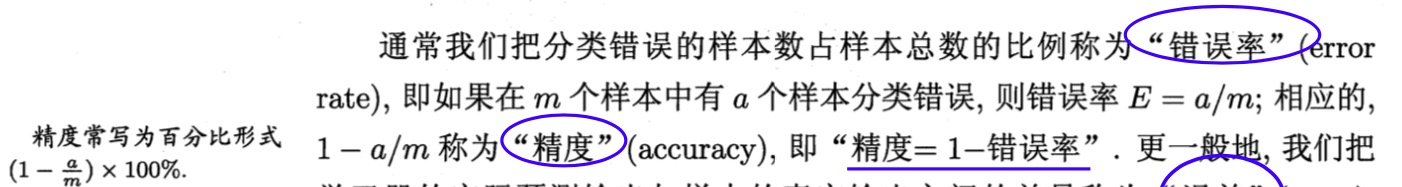

### How good is the model in terms of project requirements? 模型在项目要求方面有多好？
It is a good idea to look at examples of images from:  查看图像的示例是个好主意：  

- Random samples 随机样本
    - Some random predictions 一些随机样本的预测
- The most incorrectly labeled 最不正确的标签
    - What our model predicts wrong with very high probability. 我们的模型以非常高的概率预测错误的数据是什么。
- The most correctly labeled 最正确的标签
    - What our model is most confident of and gets right. 我们的模型最有信心，也是最正确的数据是什么。
    
This visualization is a good way of understanding what are the images the model struggles with. It might also reveal something about the dataset such as bad quality data.   
这种可视化是了解模型所面对的数据的好方法。 它还可能揭示有关数据集的一些信息，例如质量不佳的数据。

In [ ]:
print("julyfan")

In [ ]:
# I modified this from the fastai's plot_top_losses (https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L114)
from random import randint # 随机生成一个整数

def plot_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']): 
    # interp 是 ClassificationInterpretation 分类模型的效果解释函数 https://docs.fast.ai/vision.learner.html#ClassificationInterpretation
    
    # top losses will return all validation losses and indexes sorted by the largest first
    # top_losses 将返回所有 验证集的损失值(tl_val)和其索引(tl_idx) 按降序排序
    tl_val,tl_idx = interp.top_losses()
    # https://docs.fast.ai/vision.learner.html#ClassificationInterpretation.top_losses
    
    #classes = interp.data.classes
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    # matpoltlib subplots : 创建一系列的子图  nrows子图行的个数，ncols子图列的个数 ,figsize画布尺寸, ax子图的轴， fig图
    
    fig.suptitle('Predicted / Actual / Loss / Probability',fontsize=20) #标题
    
    
    
    # Random展示随机抽样的图例
    for i in range(4): # 只展示四张图
        random_index = randint(0,len(tl_idx)) # 在(0,len(tl_idx))之间随机生成一个整数
        idx = tl_idx[random_index] # 随机得到一张图片的索引
        
        # interp.data   :   https://docs.fast.ai/basic_train.html#See-results
        # dl  : 返回一些数据用于验证、训练或者测试 https://docs.fast.ai/basic_data.html#DataBunch.dl
        # https://docs.fast.ai/basic_train.html#Learner.dl
        # DatasetType.Valid : https://docs.fast.ai/basic_data.html#DatasetType
        # im 是图片 cl 是类别class,值是0/1，0指代负例，1指代肿瘤
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx] 
        
        im = image2np(im.data) # 将图片从pytorch格式转为numpy格式  https://docs.fast.ai/vision.image.html#image2np
        cl = int(cl) # 转换为整数
        ax[0,i].imshow(im)  # 在第一行第i个轴上展示这张图片
        ax[0,i].set_xticks([]) # 第一行第i个轴的x轴没有刻度
        ax[0,i].set_yticks([]) # 第一行第i个轴的y轴没有刻度
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}') # 设置标题
        # classes[interp.pred_class[idx]]是第idx的预测类别 classes[cl]是其真实标记  interp.losses[idx]是损失值  interp.probs是置信度？？
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80) # 给第一行第一个设置y轴标签
    
    
    # Most incorrect or top losses 展示前四个最不正确(损失值最大)的图例
    for i in range(4): # 只展示四张图
        idx = tl_idx[i] # tl_idx的前四个是损失值最高的
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]  # im 是图片 cl 是类别class,值是0/1，0指代负例，1指代肿瘤
        cl = int(cl) # 转换为整数
        im = image2np(im.data) # 将图片从pytorch格式转为numpy格式  https://docs.fast.ai/vision.image.html#image2np
        ax[1,i].imshow(im) # 在第二行第i个轴上展示这张图片
        ax[1,i].set_xticks([]) # 第二行第i个轴的x轴没有刻度
        ax[1,i].set_yticks([]) # 第二行第i个轴的y轴没有刻度
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}') # 设置标题
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80) # 给第二行第一个设置y轴标签

    
    # Most correct or least losses  展示前四个最正确(损失值最小)的图例
    for i in range(4): # 只展示四张图
        idx = tl_idx[len(tl_idx) - i - 1] # tl_idx的后四个是损失值最高的
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]  # im 是图片 cl 是类别class,值是0/1，0指代负例，1指代肿瘤
        cl = int(cl) # 转换为整数
        im = image2np(im.data) # 将图片从pytorch格式转为numpy格式  https://docs.fast.ai/vision.image.html#image2np
        ax[2,i].imshow(im) # 在第三行第i个轴上展示这张图片
        ax[2,i].set_xticks([]) # 第三行第i个轴的x轴没有刻度
        ax[2,i].set_yticks([]) # 第三行第i个轴的y轴没有刻度
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}') # 设置标题
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80) # 给第三行第一个设置y轴标签

In [ ]:
print("julyfan")

In [ ]:
#interp = ClassificationInterpretation.from_learner(learner) 这是之前定义的
plot_overview(interp, ['Negative','Tumor']) # 调用上面这个函数

### Gradient-weighted Class Activation Mapping (Grad-CAM)加权梯度类激活映射:一种可视化解释基于梯度定位的深度网络
[Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391)

This method produces a coarse localization map highlighting the areas that the model considers important for the classification decision. The visual explanation gives transparency to the model making it easier to notice if it has learned the wrong things. For example, if we would train a dog breed classifier and all of our images of a certain dog breed would have been taken in a dog show competition. There is a good chance that the model would learn to recognize the competition surroundings instead of doggy features with that breed. Visualizing the localization map would reveal that, and we could focus on getting more diverse data of that breed.    
该方法产生粗略的定位图，突出显示模型认为对分类决策重要的区域。 视觉解释为模型提供了透明度(可解释性)，使得更容易注意到它是否已经学到了错误的东西。 例如，如果我们要训练一只狗品种分类器，我们所有的某种狗品种的图像都会在狗展中被拍摄。 该模型很有可能学会识别狗展环境而不是狗狗的特征。 可视化本地化地图将揭示这一点，我们可以专注于获得该品种的狗狗的更多样化数据。  

In [ ]:
print("julyfan")

In [ ]:
from fastai.callbacks.hooks import *

# hook into forward pass 前向传播时自动调用这个钩子，用于检查和修改每一层的输出
# https://docs.fast.ai/callbacks.hooks.html#Hook
# https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks

# fastai 回调 ： https://pouannes.github.io/blog/callbacks-fastai/
def hooked_backward(m, oneBatch, cat):
    # we hook into the convolutional part = m[0] of the model
    with hook_output(m[0]) as hook_a:  # 创建一个保存了模型激活函数输出的钩子 https://docs.fast.ai/callbacks.hooks.html#hook_output
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(oneBatch) # 输入oneBatch给构造的模型做预测
            preds[0,int(cat)].backward() # 反向传播
    # 两个解释，我暂时看不懂(通过上下文管理器删除钩子？)：
    # https://forums.fast.ai/t/lesson-6-advanced-discussion/31442/6
    # https://forums.fast.ai/t/lesson-6-advanced-discussion/31442/2
    return hook_a,hook_g

In [ ]:
print("julyfan")

In [ ]:
# We can create a utility function for getting a validation image with an activation map
# 工具函数：画出一个验证集图片的热图
def getHeatmap(val_index):
    """Returns the validation set image and the activation map"""
    # 返回验证集图像和激活映射(热图)
    
    # this gets the model
    m = learner.model.eval()  
    # 评估模型
    # https://pytorch.org/tutorials/beginner/saving_loading_models.html
    # Remember that you must call model.eval() to set dropout and batch normalization 
    # layers to evaluation mode before running inference（推理预测）. 
    # Failing to do this will yield inconsistent inference results.

    tensorImg,cl = imgDataBunch.valid_ds[val_index]
    # valid_ds 是 validation的缩写 https://docs.fast.ai/dev/abbr.html
    # 输出图片列表tensorImg,类别列表cl，
    # https://dejanbatanjac.github.io/2019/03/15/ImageDataBunch.html
    # valid_ds 是 fastai v0.7 https://forums.fast.ai/t/how-to-get-data-val-ds-fnames-in-fastai-v1-0/37231

    
    # create a batch from the one image
    oneBatch,_ = imgDataBunch.one_item(tensorImg)
    # one_item  Get item into a batch. Optionally detach and denorm.  https://docs.fast.ai/basic_data.html#DataBunch.one_item
    # one_batch   Get one batch of from the DataBunch. Returns x,y with size of the batch_size (if bs=128 then there is a list of 128 elements).    https://docs.fast.ai/basic_data.html#DataBunch.one_batch
    # #get tensor from Image tensorfImg https://dhruvs.space/posts/grad-cam-heatmaps-along-resnet-34/

    
    oneBatch_im = vision.Image(imgDataBunch.denorm(oneBatch)[0])
    # denorm是denormalize的偏函数  https://docs.fast.ai/vision.data.html#denormalize
    # 反归一化denormalize的理解  https://stackoverflow.com/questions/4684622/how-to-normalize-denormalize-a-vector-to-range-11
    
    # convert batch tensor image to grayscale image with opencv从一个颜色空间到另一个颜色空间
    cvIm = cv2.cvtColor(image2np(oneBatch_im.data), cv2.COLOR_RGB2GRAY)
    # cv2.cvtColor https://docs.opencv.org/2.4.13.7/modules/imgproc/doc/miscellaneous_transformations.html#cv2.cvtColor
    # image2np  将图片从pytorch格式转为numpy格式  https://docs.fast.ai/vision.image.html#image2np
    
    # attach hooks 附上钩子？
    hook_a,hook_g = hooked_backward(m, oneBatch, cl) # 前面自定义的方法
    # get convolutional activations and average from channels
    
    acts = hook_a.stored[0].cpu()
    #avg_acts = acts.mean(0)
    # 这个钩子把激活的值存储到了stored里面，并放置到cpu里面

    # Grad-CAM
    grad = hook_g.stored[0][0].cpu()  #[0][0]??
    # 这个钩子把激活的值存储到了stored里面，并放置到cpu里面
    
    grad_chan = grad.mean(1).mean(1) # 求均值
    grad.shape,grad_chan.shape 
    mult = (acts*grad_chan[...,None,None]).mean(0)
    return mult, cvIm
    #mult是热点  cvIm是背景
# 生成热图的其他例子，方法挺类似的，有很多解释，有时间了细看，相信能解决很多疑惑：
# https://dhruvs.space/posts/grad-cam-heatmaps-along-resnet-34/

In [ ]:
print("julyfan")

In [ ]:
# Then, modify our plotting func a bit 终于开始画图函数啦（与前面的类似）
def plot_heatmap_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
    # interp 分类模型的效果解释函数 https://docs.fast.ai/vision.learner.html#ClassificationInterpretation
    tl_val,tl_idx = interp.top_losses()
    #classes = interp.data.classes
    # top_losses 将返回所有 验证集的损失值(tl_val)和其索引(tl_idx) 按降序排序
    # top losses will return all validation losses and indexes sorted by the largest first
    
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    # matpoltlib subplots : 创建一系列的子图  nrows子图行的个数，ncols子图列的个数 ,figsize画布尺寸, ax子图的轴， fig图
    
    fig.suptitle('Grad-CAM\nPredicted / Actual / Loss / Probability',fontsize=20) #标题
    
    # Random 随机抽样
    for i in range(4):
        random_index = randint(0,len(tl_idx)) # 在(0,max_offset)之间随机生成一个整数
        idx = tl_idx[random_index] # 该验证集的索引
        act, im = getHeatmap(idx) # 得到该图片的热图和背景
        H,W = im.shape # 图片长宽
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx] # _ 是图片 cl 是类别class,值是0/1，0指代负例，1指代肿瘤
        cl = int(cl) # 转换为整数型
        ax[0,i].imshow(im) # 在第1行，第i+1列上展示背景图
        ax[0,i].imshow(im, cmap=plt.cm.gray) # 颜色图为灰度图
        ax[0,i].imshow(act, alpha=0.5, extent=(0,H,W,0), 
              interpolation='bilinear', cmap='inferno') 
        # 画出热图
        # interpolation插值：代表图片像素颜色没有过渡   https://blog.csdn.net/goldxwang/article/details/76855200
        # 某个点的值越大，颜色越深
        # alpha透明度
        # cmp : color map颜色图
        # extent 拉伸图像 https://www.cnblogs.com/lijiazhang/p/10105722.html
        # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
        ax[0,i].set_xticks([]) # 第一行第i个轴的x轴没有刻度
        ax[0,i].set_yticks([]) # 第一行第i个轴的y轴没有刻度
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')# 设置标题
        # f-string https://blog.csdn.net/qq_33453253/article/details/79653546
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80) # 给第一行第一个设置y轴标签

    # Most incorrect or top losses 展示前四个最不正确(损失值最大)的图例
    for i in range(4): # 只展示四张图
        idx = tl_idx[i] # # tl_idx的前四个是损失值最高的
        act, im = getHeatmap(idx) # 得到该图片的热图和背景
        H,W = im.shape # 图片长宽
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx] # _ 是图片 cl 是类别class,值是0/1，0指代负例，1指代肿瘤
        cl = int(cl) # 转换为整数型
        ax[1,i].imshow(im) # 在第1行，第i+1列上展示背景图
        ax[1,i].imshow(im, cmap=plt.cm.gray) # 颜色图为灰度图
        ax[1,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        # 同上
        ax[1,i].set_xticks([]) # 第二行第i个轴的x轴没有刻度
        ax[1,i].set_yticks([]) # 第二行第i个轴的y轴没有刻度
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}') # 设置标题
        # f-string https://blog.csdn.net/qq_33453253/article/details/79653546
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80) # 给第二行第一个设置y轴标签
    
    # (同上)
    # Most correct or least losses 展示前四个最正确(损失值最小)的图例
    for i in range(4):
        idx = tl_idx[len(tl_idx) - i - 1]
        act, im = getHeatmap(idx)
        H,W = im.shape
        _,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        ax[2,i].imshow(im)
        ax[2,i].imshow(im, cmap=plt.cm.gray)
        ax[2,i].imshow(act, alpha=0.5, extent=(0,H,W,0),
              interpolation='bilinear', cmap='inferno')
        ax[2,i].set_xticks([])
        ax[2,i].set_yticks([])
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f} / {interp.probs[idx][cl]:.2f}')
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)

In [ ]:
print("julyfan")

In [ ]:
plot_heatmap_overview(interp, ['Negative','Tumor']) # 调用上面的方法，画出热图

This shows the activation maps of the predicted category so if the label is ```tumor```, the visualization shows all the places where the model thinks the tumor patterns are.  
这显示了预测类别的激活图(热图)，因此如果标签是“肿瘤”，则可视化图 会显示 模型认为肿瘤所在的所有位置。

### ROC curve and AUC : ROC曲线和曲线下面积AUC  
Remember, AUC is the metric that is used for evaluating submissions. We can calculate it here for ou validation set but it will most likely differ from the final score.  
请记住，AUC是用于本次比赛的度量标准。 我们可以用验证集计算它，但它很可能与最终得分(测试集)不同。

In [ ]:
print("julyfan")

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds # 
probs = np.exp(preds[:,1]) # 计算每个元素的指数e^x
# Compute ROC curve # 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)
# fpr 假阳性率 tpr：真阳性率 ,thresholds：阈值列表  y:真实标签 ， probs预测值，pos_label=1标签为1的是正例，其都是反例
# https://blog.csdn.net/u014264373/article/details/80487766
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn-metrics-roc-curve

# Compute ROC area # 计算曲面下面积
roc_auc = auc(fpr, tpr)
# https://scikit-learn.org/stable/modules/classes.html#classification-metrics
print('ROC area is {0}'.format(roc_auc)) # ROC area is 0.9942634117111718

In [ ]:
print("julyfan")

In [ ]:
plt.figure() #matplotlib plt.figure:创建一个新图
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
#画出ROC曲线
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # 画出对角线
plt.xlim([-0.01, 1.0]) # 设置x轴上界和下界
plt.ylim([0.0, 1.01]) # 设置y轴上界和下界
plt.xlabel('False Positive Rate') # x轴标签是
plt.ylabel('True Positive Rate') # y轴标签是
plt.title('Receiver operating characteristic') # 图的上方标题
plt.legend(loc="lower right") # 设置图例

----------------

# Submit predictions提交预测文件
### TTA测试时增强(test time augmentation)  
To evaluate the model, we run inference on all test images. As we have test time augmentation, our results will probably improve if we do predictions multiple times per image and average out the results.   
为了评估模型，我们对所有测试图像进行推理预测。 测试时间增强，即对测试集中的图像进行数据增强并多次预测取平均，我们的结果可能会提高。  
https://www.kaggle.com/andrewkh/test-time-augmentation-tta-worth-it

In [ ]:
print("julyfan")

In [ ]:
# make sure we have the best performing model stage loaded 加载之前训练的效果最好的模型参数
learner.load(MODEL_PATH + '_stage2')

# Fastai has a function for this but we don't want the additional augmentations it does (our image loader has augmentations) so we just use the get_preds
#preds_test,y_test=learner.TTA(ds_type=DatasetType.Test)
#虽然fastai有测试时增强，但是我们之前加载数据的时候就做了数据增强，所以就不用再做了

# We do a fair number of iterations to cover different combinations of flips and rotations.
# 我们做了相当数量的迭代 来执行图像翻转和旋转的不同组合的操作。
# The predictions are then averaged.
# 然后对预测结果取平均
n_aug = 12
# 增强次数
preds_n_avg = np.zeros((len(learner.data.test_ds.items),2))
# 设置一个预测值矩阵，初始值为0，形状是(len(learner.data.test_ds.items):测试集数目 , 2：反例和正例概率

for n in tqdm_notebook(range(n_aug), 'Running TTA...'): # tqdm_notebook可用于显示进度条，其第二个参数是提示用的
    preds,y = learner.get_preds(ds_type=DatasetType.Test, with_loss=False)
    # preds预测值、y预测标记  with_loss=False不计损失值  https://docs.fast.ai/basic_train.html#Learner.get_preds    
    preds_n_avg = np.sum([preds_n_avg, preds.numpy()], axis=0)
    # (2, 57458, 2) -> (57458, 2) 对第一个维度聚合相加，也可以简单理解为两个矩阵的元素对应相加
preds_n_avg = preds_n_avg / n_aug # 对这几次概率之和求平均

In [ ]:
print("julyfan")

In [ ]:
# Next, we will transform class probabilities to just tumor class probabilities
print('Negative and Tumor Probabilities: ' + str(preds_n_avg[0])) # 第一行 第一个样本的反例和正例的概率
tumor_preds = preds_n_avg[:, 1] # 概率矩阵第二列 即癌症的概率
print('Tumor probability: ' + str(tumor_preds[0])) # 第一个样本是正例(癌症)的概率
# If we wanted to get the predicted class, argmax would get the index of the max
class_preds = np.argmax(preds_n_avg, axis=1) 
# 顺着第一个维度(行)求最大值的坐标，即求每个样本的概率最大的坐标(0或1)
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.argmax.html

classes = ['Negative','Tumor'] # preds_n_avg 0 对应了Negative , 1对应了 Tumor
print('Class prediction: ' + classes[class_preds[0]])

### Submit the model for evaluation提交
We need to submit the tumor probability for each test sample in this competition. The probability ranges from 0 to 1.  
我们需要提交每个测试样本是癌症的概率，这个概率的取值范围是(0,1)

In [ ]:
print("fan")

In [ ]:
# get test id's from the sample_submission.csv and keep their original order
# 从提交模板中取得id并保持其顺序
# 从sample_submission.csv这个文件中，提取测试集的id，并保持原有的顺序
SAMPLE_SUB = '/kaggle/input/sample_submission.csv'
sample_df = pd.read_csv(SAMPLE_SUB) #pandas 读csv文件:提交文件
sample_list = list(sample_df.id) # dataframe.columns   提交文件的id列 ;Series转换为list

# List of tumor preds. 生成癌症预测概率列表
# These are in the order of our test dataset and not necessarily in the same order as in sample_submission
# 这些预测概率是按照我们测试集中的顺序排列的，稍后要重新排序
pred_list = [p for p in tumor_preds] #numpy.ndarray -> list  python列表生成式

# To know the id's, we create a dict of id:pred 把我们的id和预测值 组成 一个字典
pred_dic = dict((key, value) for (key, value) in zip(learner.data.test_ds.items, pred_list))
# python zip 把多个序列的元素对应编织在一起  https://www.python.org/dev/peps/pep-0201/#id10

# Now, we can create a new list with the same order as in sample_submission
# 现在，我们要创建一个和提交模板顺序相同的列表
pred_list_cor = [pred_dic['///kaggle/input/test/' + id + '.tif'] for id in sample_list]
# 循环地提取sample_list中的id，找到其在pred_dice字典中对应的值，生成一个规定顺序的预测概率列表

# Next, a Pandas dataframe with id and label columns.
df_sub = pd.DataFrame({'id':sample_list,'label':pred_list_cor})
# 生成一个dataframe，第一列是提交模板的id，第二列label是按照规定顺序排列的预测概率

# Export to csv
df_sub.to_csv('{0}_submission.csv'.format(MODEL_PATH), header=True, index=False)
# dataframe to_csv 将dataframe转换为csv文件，header=True保留列名，index=False不要保存索引

In [ ]:
# This is what the first 10 items of submission look like 查看提交数据的前十行
df_sub.head(10)
# pandas dataframe head 

--------------------------------------------------------------

# 部署Deploy (或测试example)
Now that we have a working model. We could deploy this for inference to another machine, a web server for example.  
现在我们有了一个有效的模型。我们需要部署这个模型到另一台机器用于推理预测，比如一个web服务器。
  
  
  For this, we need our saved model, and then we need to export the  DataBunch.  



**Note**. I haven't tried these so I cannot guarantee these will work straight away. You may need to do some debugging.我还没有尝试这些，不保证能立刻工作，可能需要一些调试。  
[Official documentation官方文档](https://docs.fast.ai/tutorial.inference.html).  


In [ ]:
print("julyfan")

In [ ]:
# This will create an export.pkl file that you'll need to copy with your model file if you want to deploy it on another device.
# This saves the internal information (classes, etc) need for inference in a file named 'export.pkl'. 
imgDataBunch.export(file='./export.pkl') # 存储模型推理预测所需要的最少的信息
# https://docs.fast.ai/data_block.html#LabelList.export
# https://github.com/fastai/fastai/blob/c15331a7b8b9fa908dbe6c0bcb38ba124e0d2768/fastai/data_block.py#L663

**On a new machine在一台新机器里**
We need to create an empty DataBunch and load it to a learner.  
我们需要创建一个空的DataBunch，然后将它加载到cnn_learner中，因为是推理预测不需要数据。

In [ ]:
######## RUN THIS ON A NEW MACHINE请在另一台新机器上运行下面的代码 ##########
# from fastai.vision import * # 包含定义计算机视觉中的数据集和训练模型所必须的函数
# from fastai import * # 更快、更简单、更先进的深度学习库
# from torchvision.models import *  # pytorch视觉模块
#arch = densenet169       # specify model architecture 所用的模型架构
#MODEL_PATH = str(arch).split()[1] + '_stage2' # 训练的模型权重
#empty_data = ImageDataBunch.load_empty('./') #这会自动搜索export.pkl文件：this will look for a file named export.pkl in the specified path
#learner = create_cnn(empty_data, arch).load(MODEL_PATH)
# 定义一个卷积神经网络，空数据，densenet169,权重采用MODEL_PATH

In [ ]:
print("fan")

In [ ]:
## And then we are ready to do predictions 然后我们就可以开始推理预测了
import cv2 # opencv
sz = 68

# This function will convert image to the prediction format #转换图像格式到模型想要的格式
def imageToTensorImage(path):
    # OpenCV reads the image in bgr format by default 用opencv读取图片，通道格式默认是bgr
    bgr_img = cv2.imread(path) 
    # cv2.split函数分离得到各个通道的灰度值(单通道图像)  https://blog.csdn.net/eric_pycv/article/details/72887758
    b,g,r = cv2.split(bgr_img)
    # cv2.merge函数是合并单通道成多通道（不能合并多个多通道图像） 
    rgb_img = cv2.merge([r,g,b])
    # crop to center to the correct size and convert from 0-255 range to 0-1 range
    # 剪裁图像的重心到正确的尺寸，然后将像素值从0-255 缩放到 0-1 的范围
    H,W,C = rgb_img.shape # 图像长、宽，通道数
    rgb_img = rgb_img[(H-sz)//2:(sz +(H-sz)//2),(H-sz)//2:(sz +(H-sz)//2),:] / 256
    # (H-sz)//2是中心小图的x轴的切片的起点，(sz +(H-sz)//2是x轴的切片的终点。
    # (H-sz)//2是中心小图的y轴的切片的起点，(sz +(H-sz)//2)是y轴的切片的终点。
    # 保持通道数不变
    
    return vision.Image(px=pil2tensor(rgb_img, np.float32))
    # This ndarray image has to be converted to tensor before passing on as fastai Image, we can use pil2tensor  
    # 这个ndarray图像必须在传递为fastai Image之前转换为张量tensor格式，我们可以使用pil2tensor方法实现
    # pil2tensor把pil格式的图片数组转换为torch格式的图片张量
    # https://docs.fast.ai/vision.image.html#Images

        
img = imageToTensorImage('/kaggle/input/test/0eb051700fb6b1bf96188f36c8e4889598c6a157.tif')
# 调用上面定义的函数，生成了一个Image对象  https://docs.fast.ai/vision.image.html#Image

## predict and visualize 预测和图像可视化
img.show(y=learner.predict(img)[0]) # y是图的标题
# 展示图像 https://docs.fast.ai/vision.image.html#Image.show

# learner.predict(img) 推理预测，三个返回值是predicted class, label and probabilities
# 第一个返回值y=learner.predict(img)[0]是预测的类别，0对应了反例negative即正常，1对应了正例即癌症tumor
# https://docs.fast.ai/vision.learner.html#Learner.predict
classes = ['negative', 'tumor']
print('This is a ' + classes[int(learner.predict(img)[0])] + ' tissue image.')
# 当int(learner.predict(img)[0])是0时，classes[int(learner.predict(img)[0])]是negative。
# 当int(learner.predict(img)[0])是1时，classes[int(learner.predict(img)[0])]是tumor。
